<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>


<div align="center">
	<img src="https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp"/>
<div>

# Task and Dataset Info

Fashion MNIST is a dataset of images of clothing items, such as shirts, pants, and shoes. The dataset was created as a more challenging alternative to the traditional MNIST dataset, which consists of images of handwritten digits.

Each image in the Fashion MNIST dataset is 28x28 pixels in size and is associated with a label indicating the type of clothing item depicted. There are 10 classes in total, including T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot.

The dataset includes 60,000 training images and 10,000 test images. It is widely used for machine learning and computer vision tasks and is often used as a benchmark for evaluating the performance of image classification models.


**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
from tensorflow.keras.datasets import fashion_mnist   # To load the MNIST digit dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [7]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))


Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

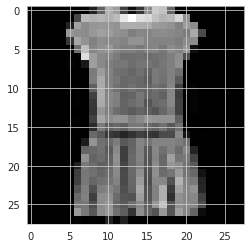

In [10]:
# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

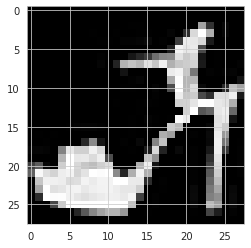

In [11]:
# pick a sample to plot
sample = 9
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [12]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

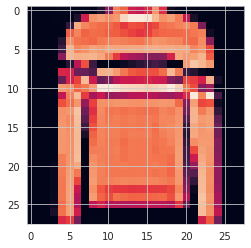

In [13]:
plt.imshow(X_train[5]);
# plt.matshow(X_train[5])

In [14]:
y_train[5] # it belongs to class 2

2

Lets take a look at a few more examples. This time, plot multiple images spread across several rows and columns.

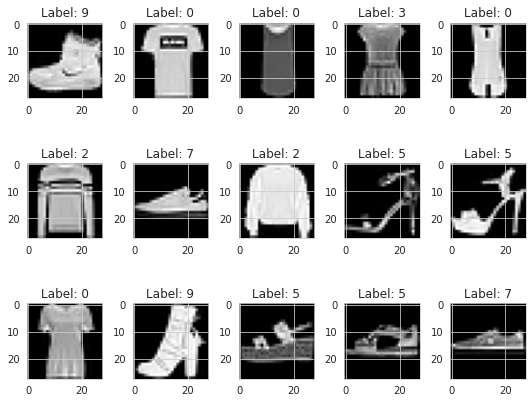

In [15]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [16]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [18]:
X_train[5].min()

0.0

In [19]:
X_train[5].max()

1.0

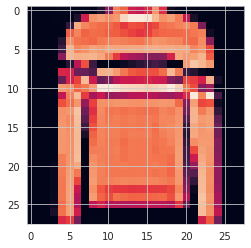

In [20]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
num_classes = 10
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)


In [26]:
y_train[0]

9

In [27]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [52]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam


In [59]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = Adam(lr=0.001)
model.compile(loss ='categorical_crossentropy', optimizer=opt,metrics =['accuracy'])

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4732)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=8, restore_best_weights = True)

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [61]:
model.fit(X_train, Y_train, batch_size=128,epochs=200, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4754 - accuracy: 0.8285 - val_loss: 0.3924 - val_accuracy: 0.8556
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.3039 - accuracy: 0.8904 - val_loss: 0.3027 - val_accuracy: 0.8894
Epoch 3/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2632 - accuracy: 0.9037 - val_loss: 0.2708 - val_accuracy: 0.9002
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2285 - accuracy: 0.9150 - val_loss: 0.2529 - val_accuracy: 0.9063
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2069 - accuracy: 0.9233 - val_loss: 0.2478 - val_accuracy: 0.9081
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1883 - accuracy: 0.9297 - val_loss: 0.2390 - val_accuracy: 0.9112
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1703 - accuracy: 0.9362 - val_loss: 0.2407 - val_accuracy: 0.9140

In [40]:
X_train.shape, Y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [41]:
model.metrics_names

['loss', 'accuracy']

**TASK 7: Plot values of metrics you used in your model.**

In [62]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.475,0.829,0.392,0.856
1,0.304,0.890,0.303,0.889
2,0.263,0.904,0.271,0.900
3,0.228,0.915,0.253,0.906
4,0.207,0.923,0.248,0.908


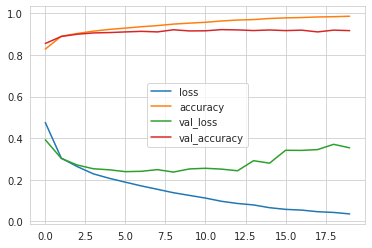

In [63]:
summary.plot();

Text(0.5, 1.0, 'Train - Accuracy')

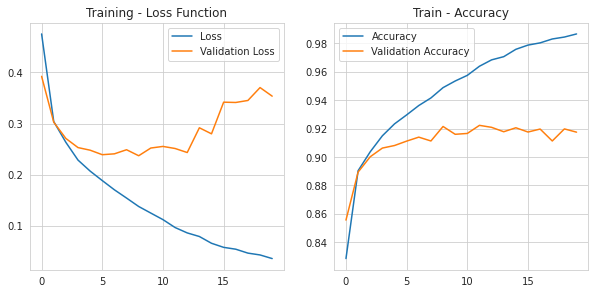

In [64]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(summary['loss'], label='Loss')
plt.plot(summary['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(summary["accuracy"], label='Accuracy')
plt.plot(summary["val_accuracy"], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

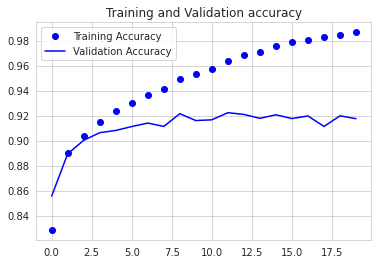

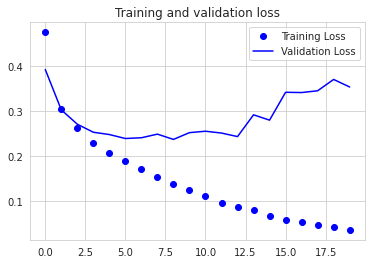

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = summary["accuracy"]
val_accuracy = summary["val_accuracy"]
loss = summary['loss']
val_loss = summary['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [66]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2512 - accuracy: 0.9223


[0.25116169452667236, 0.9222999811172485]

In [67]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25116169452667236
Test accuracy: 0.9222999811172485


## Prediction

In [68]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.33821601e-07, 5.41913403e-09, 5.63329872e-09, ...,
        6.01090178e-05, 2.66221045e-09, 9.99936223e-01],
       [3.28223427e-06, 6.37002393e-16, 9.99995470e-01, ...,
        9.98794570e-16, 3.93046750e-15, 4.20867903e-14],
       [1.31601821e-11, 1.00000000e+00, 7.46754750e-15, ...,
        2.82992341e-21, 3.47098110e-13, 8.09816444e-21],
       ...,
       [1.05619445e-11, 1.26394561e-14, 1.14267701e-14, ...,
        1.81824023e-09, 1.00000000e+00, 1.18786816e-13],
       [4.74636663e-10, 1.00000000e+00, 3.73422301e-14, ...,
        4.55611981e-16, 9.02290734e-14, 5.17751271e-16],
       [5.16578657e-05, 1.68493102e-07, 2.90052094e-06, ...,
        7.42697418e-02, 8.24225077e-04, 5.08041261e-03]], dtype=float32)

In [69]:
pred_prob.shape

(10000, 10)

In [70]:
pred_prob[0]

array([1.3382160e-07, 5.4191340e-09, 5.6332987e-09, 6.4520556e-10,
       1.2092628e-08, 3.4661182e-06, 6.2762929e-08, 6.0109018e-05,
       2.6622105e-09, 9.9993622e-01], dtype=float32)

In [71]:
np.argmax(pred_prob[0])

9

In [72]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [112]:
y_pred.shape

(10000,)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.88      0.88      1000
           3       0.94      0.91      0.92      1000
           4       0.84      0.91      0.88      1000
           5       0.99      0.98      0.99      1000
           6       0.79      0.78      0.78      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [74]:
print(confusion_matrix(y_test, y_pred))

[[853   0  16  15   6   0 105   0   5   0]
 [  2 984   1   8   3   0   1   0   1   0]
 [ 13   1 882   5  57   0  42   0   0   0]
 [ 17   4  16 905  36   0  20   0   2   0]
 [  1   0  34  14 914   0  37   0   0   0]
 [  0   0   0   0   0 984   0  13   0   3]
 [ 76   1  56  17  66   0 779   0   5   0]
 [  0   0   0   0   0   6   0 970   0  24]
 [  6   0   0   3   5   1   0   2 983   0]
 [  0   0   0   0   0   5   1  25   0 969]]


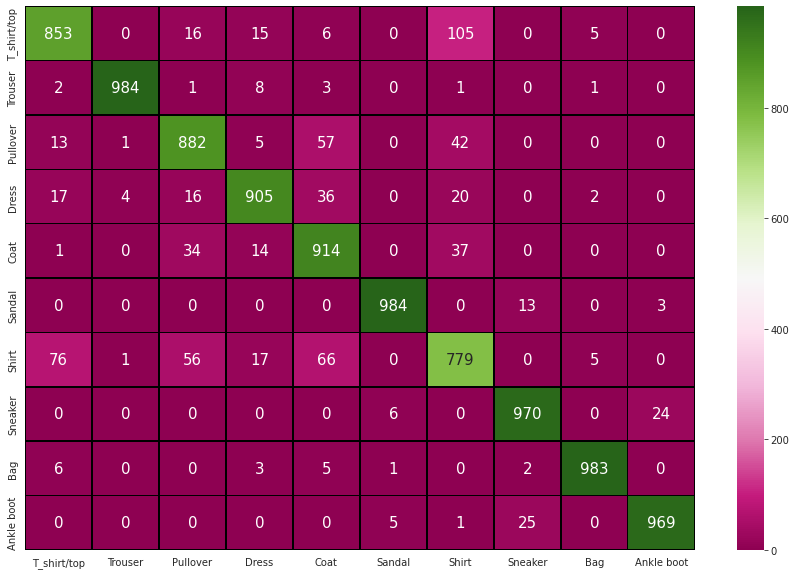

In [76]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="PiYG", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names);

In [77]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [78]:
(y_test != y_pred).sum()

777

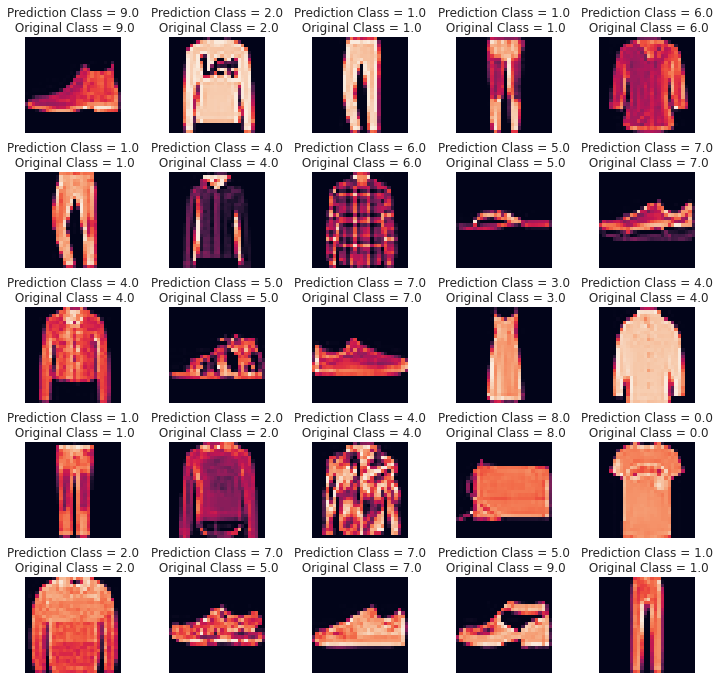

In [79]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {y_pred[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# End of Assignment